In [1]:
pip install tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r"C:\Users\Computing\Downloads\data-task1\data-task1\train"
test_path = r"C:\Users\Computing\Downloads\data-task1\data-task1\test"

In [4]:
# add preprocessing layer to the front of ResNet50
resnet50_model = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:

# don't train existing weights
for layer in resnet50_model.layers:
  layer.trainable = False

In [6]:
 # useful for getting number of classes
folders = glob(r"C:\Users\Computing\Downloads\data-task1\data-task1\train\*")

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet50_model.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)


In [8]:
# create a model object
model = Model(inputs=resnet50_model.input, outputs=prediction)


In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory(r"C:\Users\Computing\Downloads\data-task1\data-task1\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3000 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory(r"C:\Users\Computing\Downloads\data-task1\data-task1\test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 500 images belonging to 2 classes.


In [15]:
#Adding the Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

In [16]:
#ModelCheckpoint callback saves a model at some interval. 
filepath=r"C:\Users\Computing\Downloads\data-task1\data-task1\ResNet50_saved_models.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [17]:
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=8, min_delta=0.001, mode='min', verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for eight consecutive epochs.

In [18]:
#CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv = CSVLogger('my_logs.csv', separator=',', append=False)

callbacks_list = [checkpoint, early_stop, log_csv]

In [19]:

#Training the neural network
#We can now use these generators to train our model. 
#Give this a name so we can call it later for plotting loss, accuracy etc. as a function of epochs.
# fit the model
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
 callbacks= callbacks_list)

model.save('ResNet50_saved_models.hdf5')  # always save your weights after training or during training

<ipython-input-19-f0593efc5afd>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
94/94 [==============================] - 132s 1s/step - loss: 2.7411 - accuracy: 0.6980 - val_loss: 1.1865 - val_accuracy: 0.2740
Epoch 2/50
94/94 [==============================] - 115s 1s/step - loss: 0.7093 - accuracy: 0.7247 - val_loss: 0.8394 - val_accuracy: 0.7900
Epoch 3/50
94/94 [==============================] - 112s 1s/step - loss: 0.6014 - accuracy: 0.7390 - val_loss: 0.4774 - val_accuracy: 0.7900
Epoch 4/50
94/94 [==============================] - 112s 1s/step - loss: 0.5951 - accuracy: 0.7367 - val_loss: 0.4762 - val_accuracy: 0.7900
Epoch 5/50
94/94 [==============================] - 111s 1s/step - loss: 0.6280 - accuracy: 0.7320 - val_loss: 0.5302 - val_accuracy: 0.7220
Epoch 6/50
94/94 [==============================] - 111s 1s/step - loss: 0.4936 - accuracy: 0.7757 - val_loss: 0.4856 - val_accuracy: 0.7900
Epoch 7/50
94/94 [==============================] - 111s 1s/step - loss: 0.4885 - accuracy: 0.7810 - val_loss: 0.5157 - val_accuracy: 0.7900
Epoch 8/50
94

In [44]:
#Evaluating the model
train_loss, train_acc = model.evaluate(training_set, steps=32)
validation_loss, test_acc = model.evaluate(test_set, steps=32)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

32/32 [==============================] - 13s 387ms/step - loss: 0.5269 - accuracy: 0.7160
Train: 0.764, Test: 0.716


In [35]:
train_loss, train_acc = model.evaluate(training_set, steps=32)
test_loss, test_acc = model.evaluate(test_set, steps=32)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

32/32 [==============================] - 13s 389ms/step - loss: 0.5269 - accuracy: 0.7160
Train: 0.755, Test: 0.716


In [45]:
history

In [46]:
history.history

{'loss': [2.7411227226257324,
  0.7093198895454407,
  0.6014072299003601,
  0.5950949192047119,
  0.6280158162117004,
  0.49357908964157104,
  0.4885333180427551,
  0.4733014702796936,
  0.47142764925956726,
  0.4698230028152466,
  0.4679780602455139,
  0.49386104941368103,
  0.47897374629974365,
  0.4698261022567749,
  0.47402623295783997,
  0.4567943215370178],
 'accuracy': [0.6980000138282776,
  0.7246666550636292,
  0.7390000224113464,
  0.7366666793823242,
  0.7319999933242798,
  0.7756666541099548,
  0.781000018119812,
  0.7863333225250244,
  0.7823333144187927,
  0.7839999794960022,
  0.7886666655540466,
  0.7763333320617676,
  0.7806666493415833,
  0.7926666736602783,
  0.7923333048820496,
  0.7940000295639038],
 'val_loss': [1.1864862442016602,
  0.8394261598587036,
  0.47737398743629456,
  0.4761808514595032,
  0.5302267670631409,
  0.4856330454349518,
  0.5157448649406433,
  0.460797518491745,
  0.46692386269569397,
  0.4757142663002014,
  0.4599233865737915,
  0.46338263154

Values stored in history are ... 
 {'loss': [2.7411227226257324, 0.7093198895454407, 0.6014072299003601, 0.5950949192047119, 0.6280158162117004, 0.49357908964157104, 0.4885333180427551, 0.4733014702796936, 0.47142764925956726, 0.4698230028152466, 0.4679780602455139, 0.49386104941368103, 0.47897374629974365, 0.4698261022567749, 0.47402623295783997, 0.4567943215370178], 'accuracy': [0.6980000138282776, 0.7246666550636292, 0.7390000224113464, 0.7366666793823242, 0.7319999933242798, 0.7756666541099548, 0.781000018119812, 0.7863333225250244, 0.7823333144187927, 0.7839999794960022, 0.7886666655540466, 0.7763333320617676, 0.7806666493415833, 0.7926666736602783, 0.7923333048820496, 0.7940000295639038], 'val_loss': [1.1864862442016602, 0.8394261598587036, 0.47737398743629456, 0.4761808514595032, 0.5302267670631409, 0.4856330454349518, 0.5157448649406433, 0.460797518491745, 0.46692386269569397, 0.4757142663002014, 0.4599233865737915, 0.46338263154029846, 0.4654708206653595, 0.4983528256416321, 0

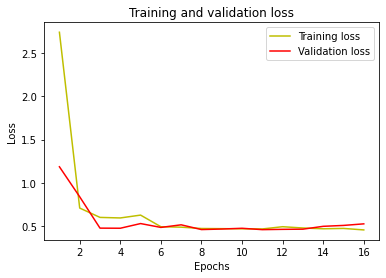

In [59]:
#plot the training and validation accuracy and loss at each epoch
print("Values stored in history are ... \n", history.history)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Values stored in history are ... 
 {'loss': [2.7411227226257324, 0.7093198895454407, 0.6014072299003601, 0.5950949192047119, 0.6280158162117004, 0.49357908964157104, 0.4885333180427551, 0.4733014702796936, 0.47142764925956726, 0.4698230028152466, 0.4679780602455139, 0.49386104941368103, 0.47897374629974365, 0.4698261022567749, 0.47402623295783997, 0.4567943215370178], 'accuracy': [0.6980000138282776, 0.7246666550636292, 0.7390000224113464, 0.7366666793823242, 0.7319999933242798, 0.7756666541099548, 0.781000018119812, 0.7863333225250244, 0.7823333144187927, 0.7839999794960022, 0.7886666655540466, 0.7763333320617676, 0.7806666493415833, 0.7926666736602783, 0.7923333048820496, 0.7940000295639038], 'val_loss': [1.1864862442016602, 0.8394261598587036, 0.47737398743629456, 0.4761808514595032, 0.5302267670631409, 0.4856330454349518, 0.5157448649406433, 0.460797518491745, 0.46692386269569397, 0.4757142663002014, 0.4599233865737915, 0.46338263154029846, 0.4654708206653595, 0.4983528256416321, 0

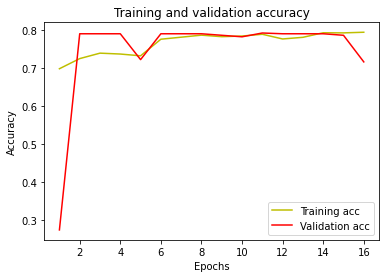

In [60]:
#plot the training and validation accuracy and loss at each epoch
print("Values stored in history are ... \n", history.history)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

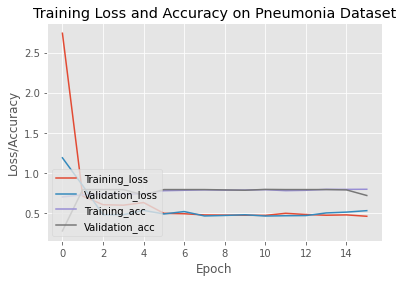

In [83]:
#Accuracy and Loss curve in single graph
# plot the training loss and accuracy
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(N)), history.history["loss"], label="Training_loss")
plt.plot(np.arange(0, len(N)), history.history["val_loss"], label="Validation_loss")
plt.plot(np.arange(0, len(N)), history.history["accuracy"], label="Training_acc")
plt.plot(np.arange(0, len(N)), history.history["val_accuracy"], label="Validation_acc")
plt.title("Training Loss and Accuracy on Pneumonia Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

**Evaluation**

In [92]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [98]:
# Evaluate the model
scores = model.evaluate_generator(test_set)
print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

<ipython-input-98-d33ba6da31cf>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_set)


Loss of the model: 0.53
Test Accuracy: 71.60%


In [99]:
scores = model.evaluate_generator(training_set)
print("Loss of the model: %.2f"%(scores[0]))
print("Training Accuracy: %.2f%%"%(scores[1] * 100))

<ipython-input-99-ddfd143517da>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(training_set)


Loss of the model: 0.50
Training Accuracy: 75.40%


In [100]:
val_path = r"C:\Users\Computing\Downloads\data-task1\data-task1\val"

In [103]:
val_datagen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.4,
    zoom_range=0.4
)

In [104]:
val_set = val_datagen.flow_from_directory(r"C:\Users\Computing\Downloads\data-task1\data-task1\val",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 500 images belonging to 2 classes.


In [105]:
val_set.class_indices

{'no_pneumonia': 0, 'pneumonia': 1}

In [106]:
STEP_SIZE_TEST=val_set.n
val_set.reset()
Val_pred=model.predict_generator(val_set,steps=STEP_SIZE_TEST,verbose=1)

<ipython-input-106-77ad409d60c5>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Val_pred=model.predict_generator(val_set,steps=STEP_SIZE_TEST,verbose=1)


500/500 [==============================] - 17s 32ms/step


In [163]:
## get prediction for Val data set
prediction=[]
for i in range(Val_pred.shape[0]):
    prediction.append("Normal" if Val_pred[i][0]>0.5 else "Pneumonia")

In [164]:
import glob

In [165]:
#Get actual classes

val_data={}
for i in glob.glob(r"C:\Users\Computing\Downloads\data-task1\data-task1\val\no_pneumonia\*.png"):
    val_data[i[-25:]]="no_pneumonia"
for i in glob.glob(r"C:\Users\Computing\Downloads\data-task1\data-task1\val\pneumonia\*.png"):
    val_data[i[-29:]]="Pneumonia"

In [166]:
val_df=pd.DataFrame(columns=['image','label','prediction'])
image=[]
label=[]
for k,v in val_data.items():
    image.append(k)
    label.append(v)
    
val_df['image']=image
val_df['label']=label
val_df['prediction']=prediction

In [167]:
print(val_df)

                             image         label prediction
0        b0d-8a26-f808d97171c4.png  no_pneumonia  Pneumonia
1        0c8-af85-8b0c6a972b01.png  no_pneumonia     Normal
2        562-bfec-bec5235943d2.png  no_pneumonia  Pneumonia
3        585-9e9b-561a4432fa57.png  no_pneumonia  Pneumonia
4        c3d-954a-33576cb50600.png  no_pneumonia     Normal
..                             ...           ...        ...
495  56-4b52-a014-eea3d0d00efc.png     Pneumonia  Pneumonia
496  b3-4af9-8b26-657ee2abcd9a.png     Pneumonia  Pneumonia
497  73-4ccb-806c-850c5a38dad6.png     Pneumonia  Pneumonia
498  e0-4e2e-8951-26ac8af5ef89.png     Pneumonia  Pneumonia
499  15-4f84-9b97-345f35ad2083.png     Pneumonia  Pneumonia

[500 rows x 3 columns]


<AxesSubplot:>

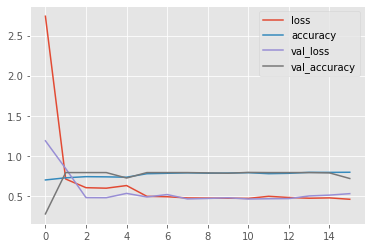

In [168]:
pd.DataFrame(history.history).plot()

In [424]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

import numpy as np

#preds = model.predict(test_set)
#preds = np.around(preds)


In [425]:
test_pred = model.predict_generator(test_set)
y_pred = np.argmax(test_pred, axis=1)

<ipython-input-425-c14bf3b956d5>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_pred = model.predict_generator(test_set)


<Figure size 432x288 with 0 Axes>

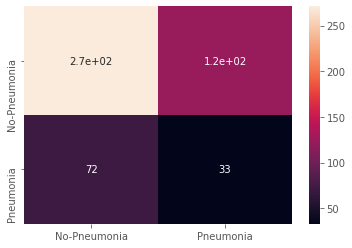

<Figure size 432x288 with 0 Axes>

In [443]:
#Visualizing confusion matrix
cm = confusion_matrix(test_set.labels,y_pred)

sns.heatmap(cm,annot=True,xticklabels=['No-Pneumonia', 'Pneumonia'],
            yticklabels=['No-Pneumonia', 'Pneumonia'])
plt.figure()



In [444]:
TN, FP, FN, TP = cm.ravel()
print(TN, FP, FN, TP)

271 124 72 33


In [475]:
#Recall=((TP)/(TP+FN))
#Recall

In [476]:
#Precision=((TP)/(TP+FP))
#Precision

In [477]:
#f1_score= 2*((Recall*Precision)/(Recall+Precision))
#f1_score

In [479]:
#calculating precision and reall
#accuracy = accuracy_score(test_set.labels, y_pred)*100
#precision = precision_score(test_set.labels, y_pred)
#recall = recall_score(test_set.labels, y_pred)
#f1_score = f1_score()

#print('Accuracy: ',accuracy)
#print('Precision: ',precision)
#print('Recall: ',recall)


In [489]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
test_pred = model.predict_generator(test_set)
#preds = model.predict(test_set)

#acc = accuracy_score([y_pred, np.round(test_pred)]*100).transpose()
acc = accuracy_score(test_set.labels, np.round(y_pred))*100
cm = confusion_matrix(test_set.labels, np.round(y_pred))
                     

TN, FP, FN, TP = cm.ravel() 
print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = TP/(TP+FP)*100
recall = TP/(TP+FN)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}%'.format(np.round((history.history['accuracy'][-1])*100, 2)))

<ipython-input-489-601dc37a35a4>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_pred = model.predict_generator(test_set)


CONFUSION MATRIX ------------------
[[271 124]
 [ 72  33]]

TEST METRICS ----------------------
Accuracy: 60.8%
Precision: 21.019108280254777%
Recall: 31.428571428571427%
F1-score: 25.19083969465649

TRAIN METRIC ----------------------
Train acc: 79.4%


In [490]:
!pip install visualkeras

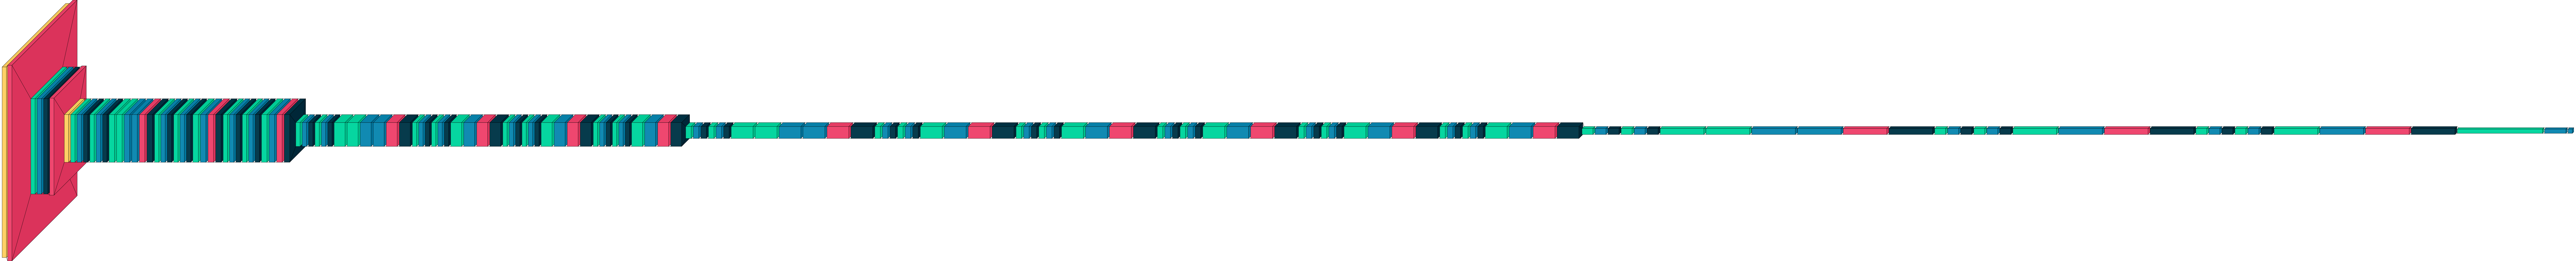

In [491]:
import visualkeras
visualkeras.layered_view(model).show() # display using your system viewer
##visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)


In [500]:
val_pred = model.predict_generator(val_set)
y_pred1 = np.argmax(pred, axis=1)

<ipython-input-500-9c8a67893e4d>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  val_pred = model.predict_generator(val_set)


<Figure size 432x288 with 0 Axes>

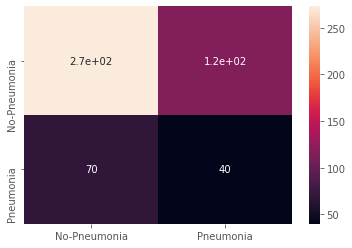

<Figure size 432x288 with 0 Axes>

In [501]:
#Visualizing confusion matrix
cm = confusion_matrix(val_set.labels,y_pred1)

sns.heatmap(cm,annot=True,xticklabels=['No-Pneumonia', 'Pneumonia'],
            yticklabels=['No-Pneumonia', 'Pneumonia'])
plt.figure()


In [502]:
TN1, FP1, FN1, TP1 = cm.ravel()
print(TN1, FP1, FN1, TP1)

273 117 70 40


In [503]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
val_pred = model.predict_generator(val_set)
y1_pred = np.argmax(val_pred, axis=1)
#preds = model.predict(test_set)

#acc = accuracy_score([y_pred, np.round(test_pred)]*100).transpose()
acc = accuracy_score(val_set.labels, np.round(y1_pred))*100
cm = confusion_matrix(val_set.labels, np.round(y1_pred))
                     

TN1, FP1, FN1, TP1 = cm.ravel() 
print('CONFUSION MATRIX ------------------')
print(cm)

print('\nVAL METRICS ----------------------')
precision = TP1/(TP1+FP1)*100
recall = TP1/(TP1+FN1)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}%'.format(np.round((history.history['accuracy'][-1])*100, 2)))

<ipython-input-503-6d94608729cd>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  val_pred = model.predict_generator(val_set)


CONFUSION MATRIX ------------------
[[249 141]
 [ 63  47]]

VAL METRICS ----------------------
Accuracy: 59.199999999999996%
Precision: 25.0%
Recall: 42.72727272727273%
F1-score: 31.54362416107383

TRAIN METRIC ----------------------
Train acc: 79.4%
